# Сравнительный анализ алгоритмов поиска подстроки в строке
## (поиск последнего вхождения) 
## Выполнила: Степашкина В.П. БПИ216

### В данной работе выполнены все приложенные алгоритмы + как дополнительный реализован алгоритм Бойера-Мура (+ подстановочные символы)
### 1) в файле smallArr.csv лежат измерения по времени (с экспортом в сsv графики легче было построить)
### 2) в файле algo.сpp лежат классы-наследники с реализацией методов поиска
### 2) в файле Randomizer.cpp лежит рандом генерация требуемых текстов 

#### Данные усреднялись по 20-ти прогонам

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./smallArr.csv',';')

<ipython-input-2-854b573968b1>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('./smallArr.csv',';')


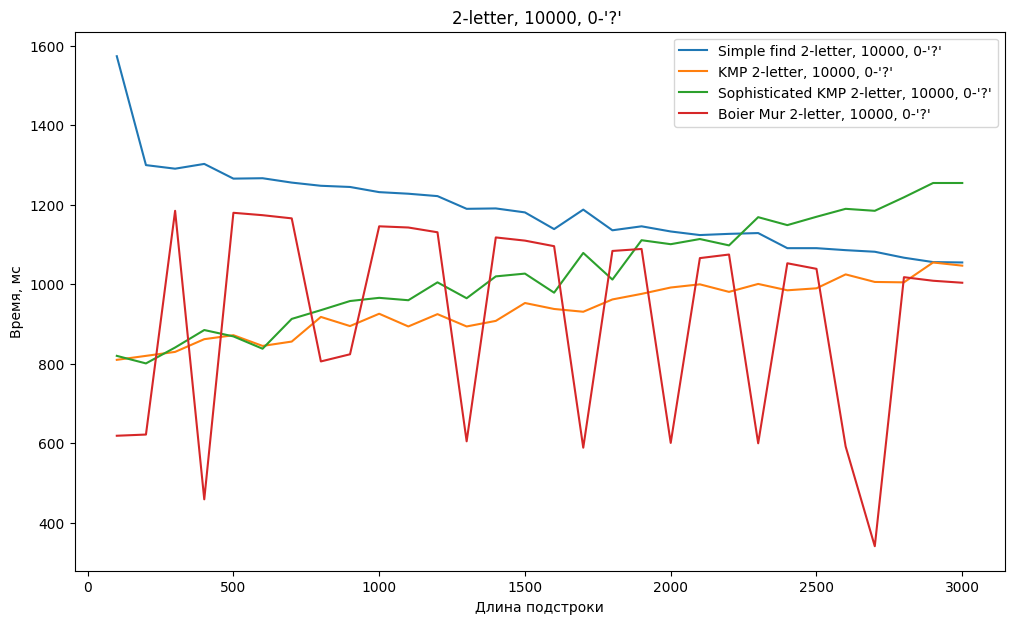

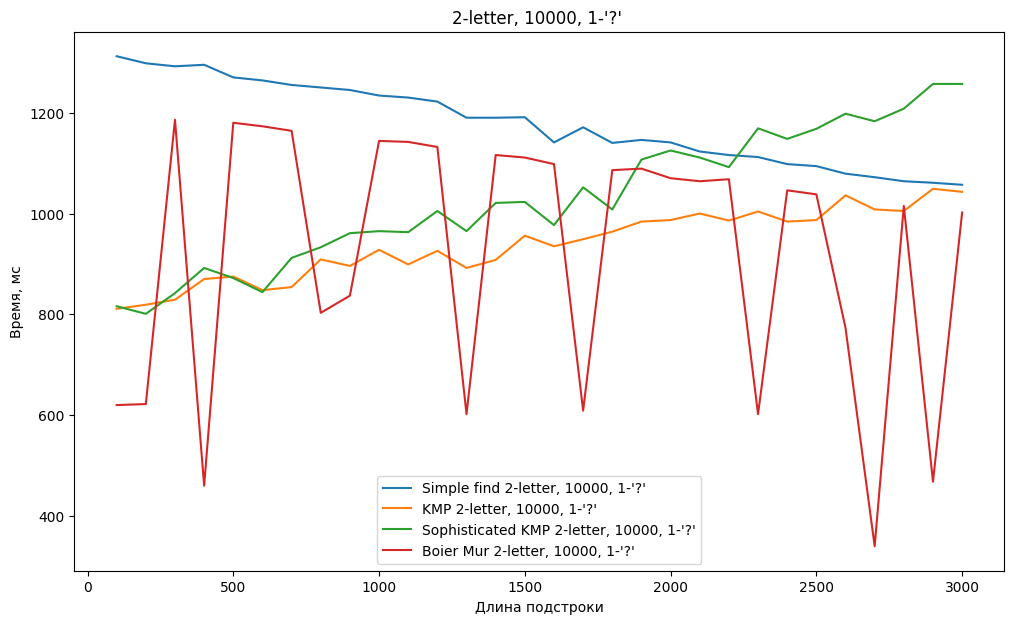

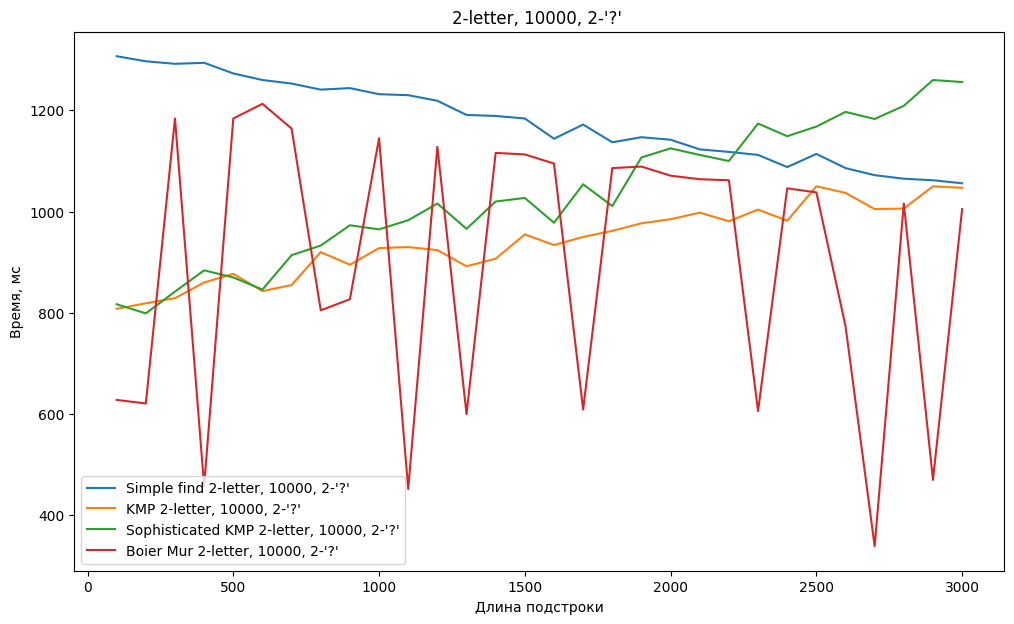

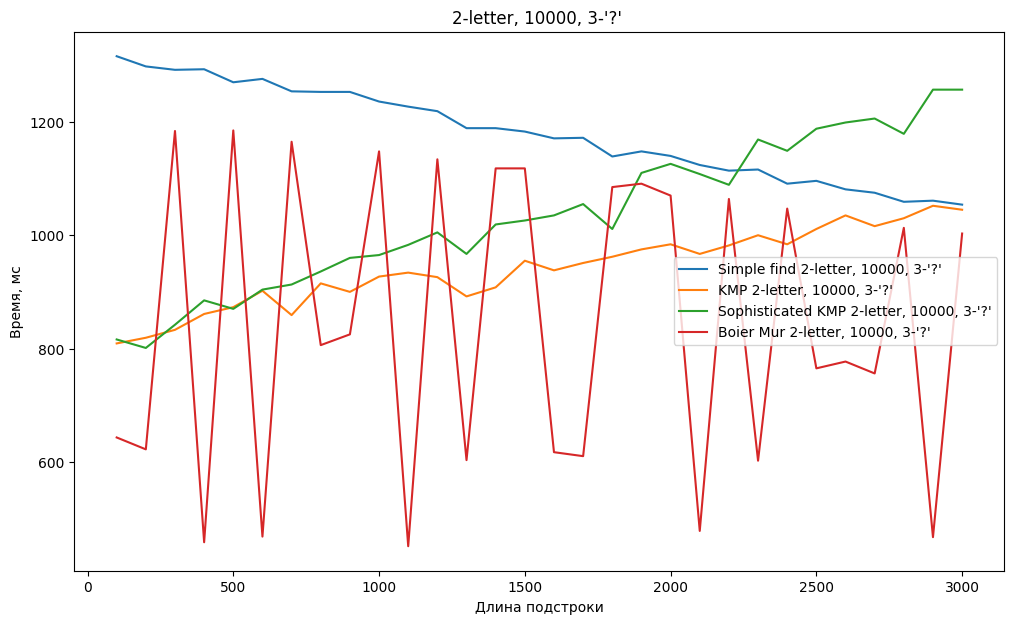

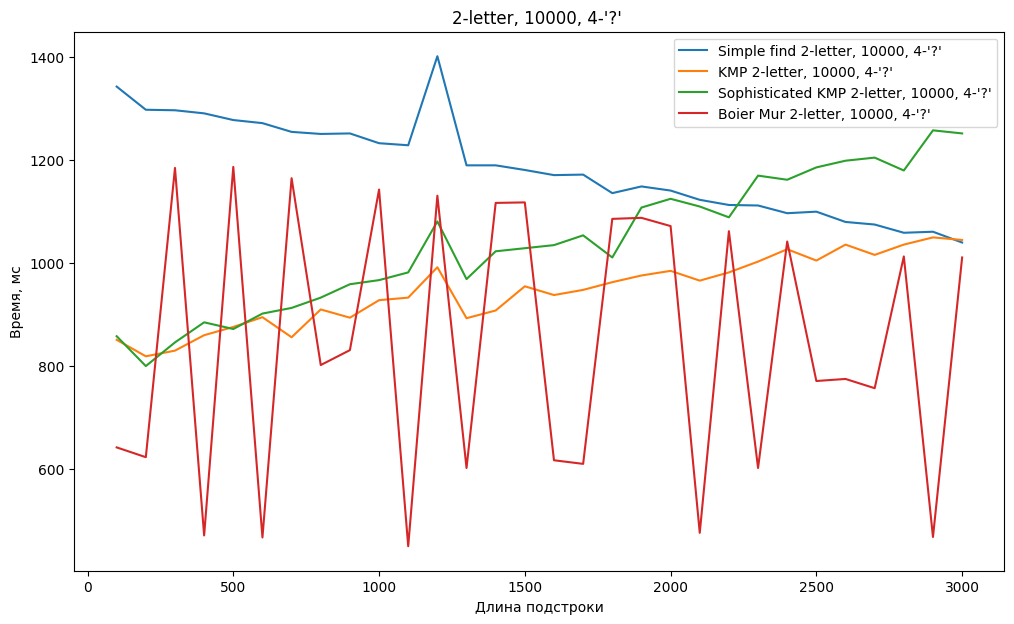

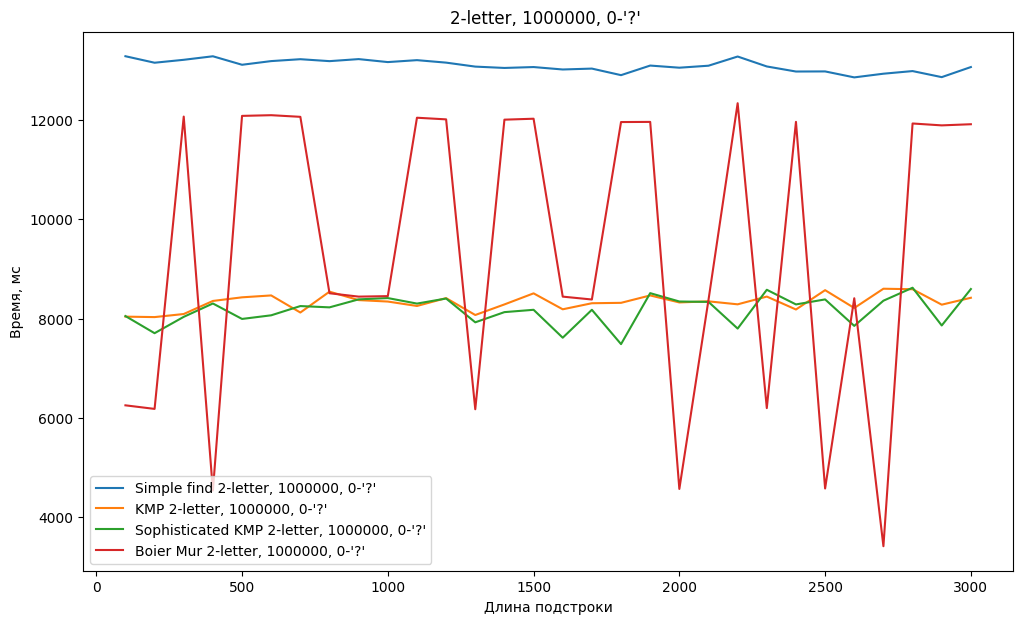

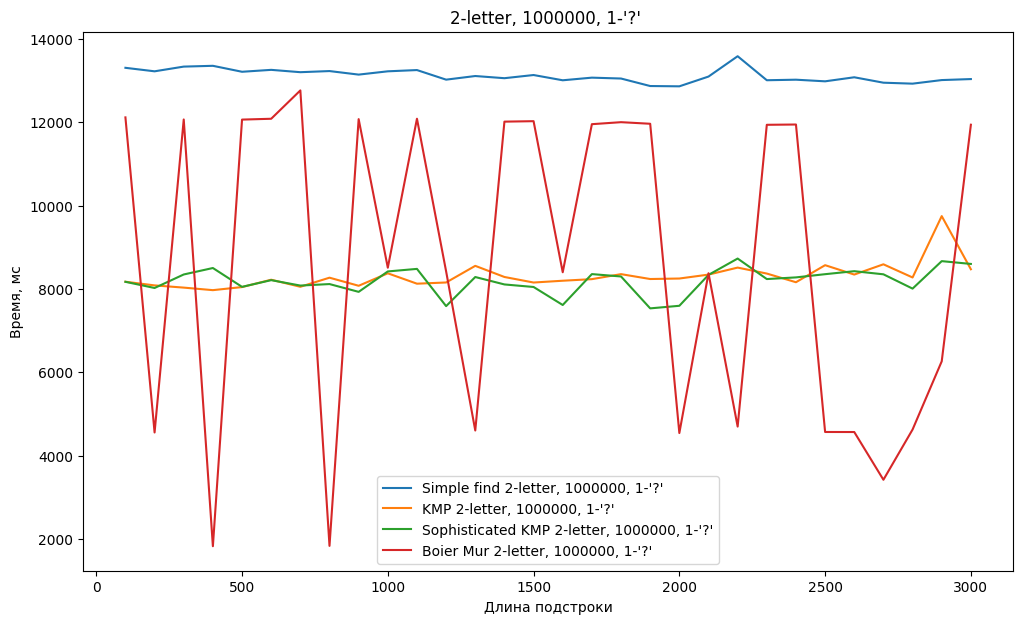

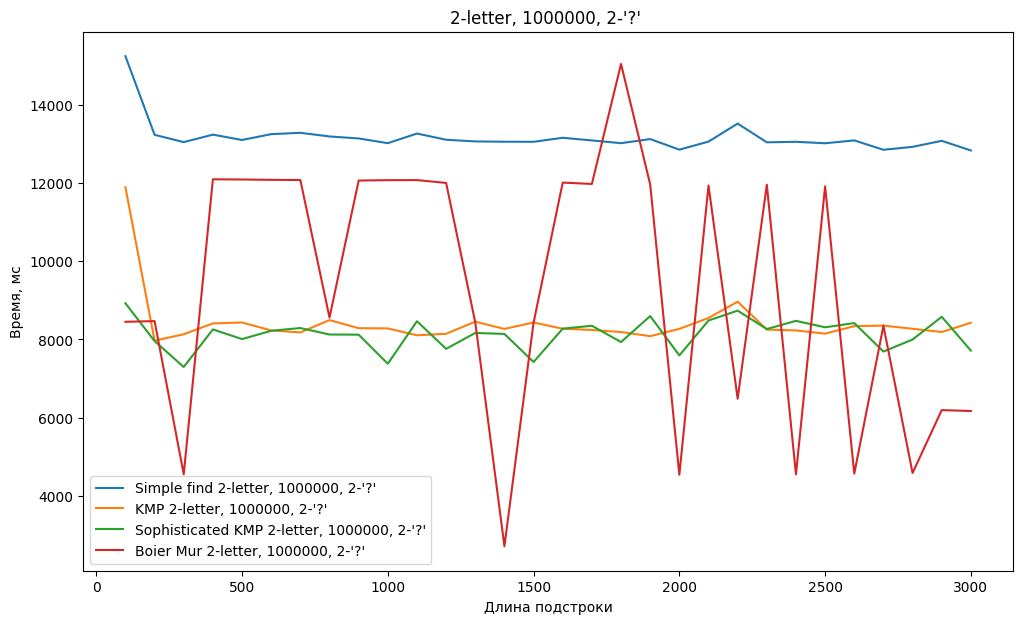

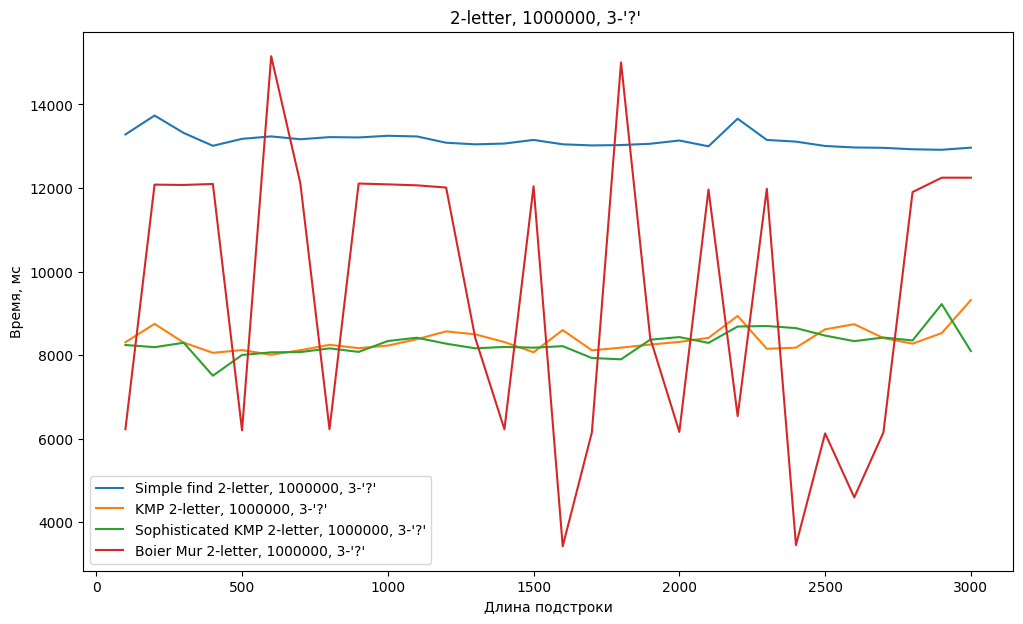

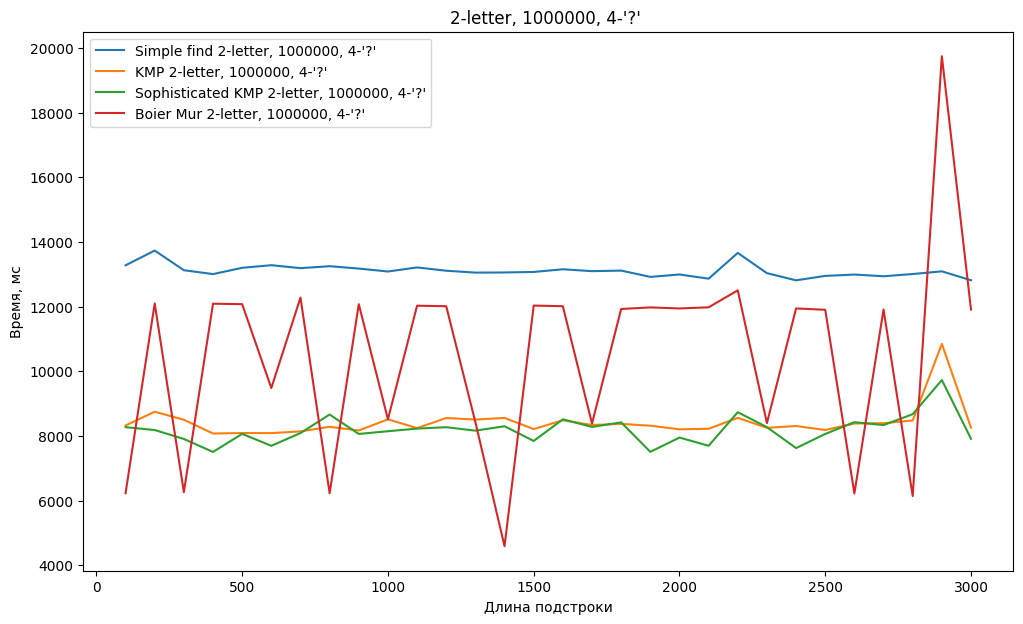

In [3]:
k=1
for j in range(1,11):
  x=np.arange(100,3001,100)
  plt.figure(figsize=(12, 7))
  for i in range(1,5):
    y=data.iloc[:, k+i-1]
    plt.plot(x,y,label = data.columns[k+i-1])
  plt.xlabel("Длина подстроки")
  plt.ylabel("Время, мс")
  plt.legend()
  plt.title(f"{data.columns[k][12:]} ")
  k+=4

## Наблюдения на бинарном алфавите
### На массиве 10000 символов:

1) Поиск в лоб показывает неплохой результат, поскольку алгоритм ищет последнее вхождение, нет прерывания посередине => алгоритм выполнит в худшем (n - m + 1)*(m) сравнений символов (из-за такой зависимости на небольшом массиве мы видим отрицательный наклон относительно роста длины подстроки)

2) КМП и его версия с уточненными гранями представляют стабильно растущую линейную зависимость ( накладные расходы на вычисление массива граней + уточненных граней делают его сравнимым с наивным алгоритмом на малом массиве  - солидная константа в асимптотике в какой-то момент дала преимуществу наивному алгоритму)

3) Колебания в алгоритме Бойера-Мура связаны с меняющейся асимптотикой, лучший случай достигается, когда текст и паттерн различны (двигаемся большими отступами и асимптотика O(n/m) и в худшем случае при похожем суффиксе у строк сложность приходит к O(n*m), в среднем O(m/кол-во уникальных символов) ~O(n). В нашем случае ( из-за небольшого алфавита вероятность достичь худшего и лучшего случая высока - удивительные колебания)

( В свою очередь добавление подстановочных символов не сильно меняет общую асимтотику + немного сравнений ( небольшое изменения угла наклона)

### На массиве 1000000 символов:

1) Плюсом к тому, что сказано про массив меньшей длины, на большом массиве видна "неоптимальность" наивного поиска - худший вариант из представленных.

2) Поскольку КМП изначально придумывался ( и является оптимальным для использования) на цепочках днк ( 2-4 символьный алфавит) он хорошо себя показывает на этих тестах (на обычной книге художественной литературы он был бы не лучше, чем чуть оптимизированный наивный алгоритм статья на хабре про это имеется)+ уточненные грани дают преимущество в этом случае

3) в Муре мы по-прежнему колебелемся между лучшим и худшим случаем

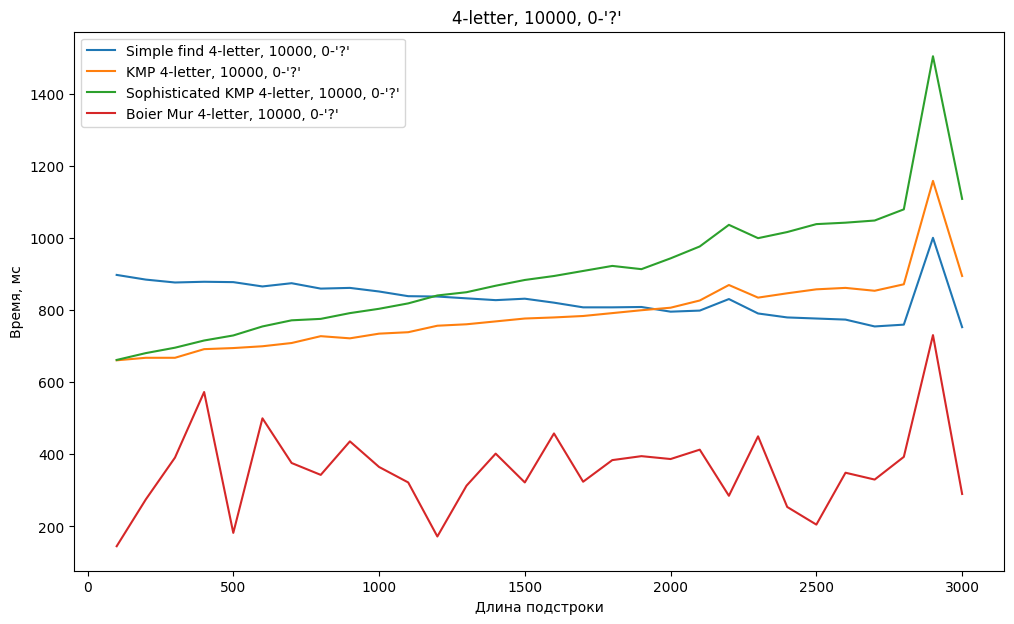

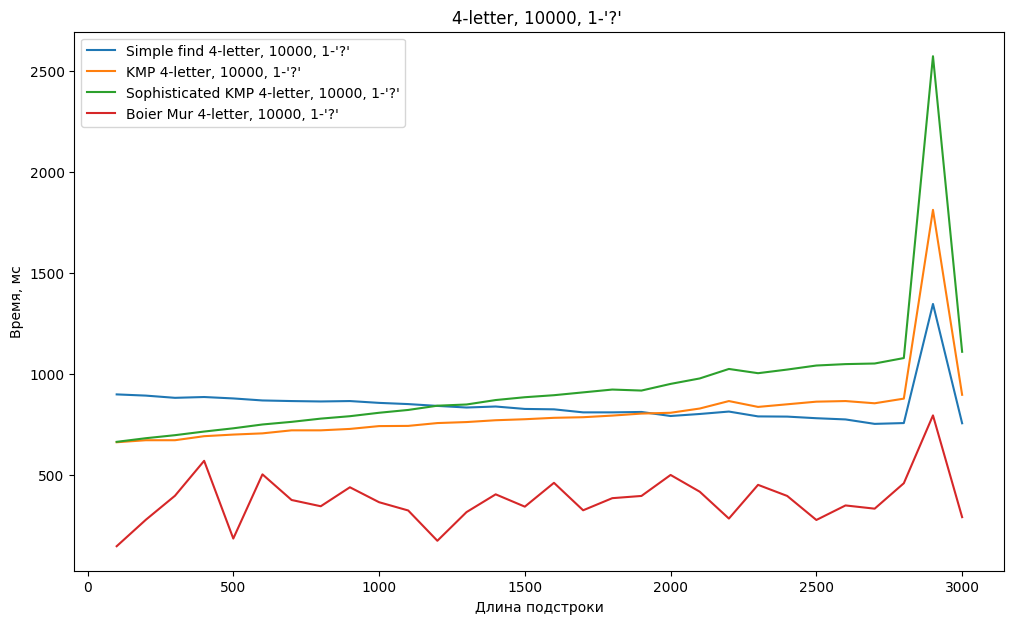

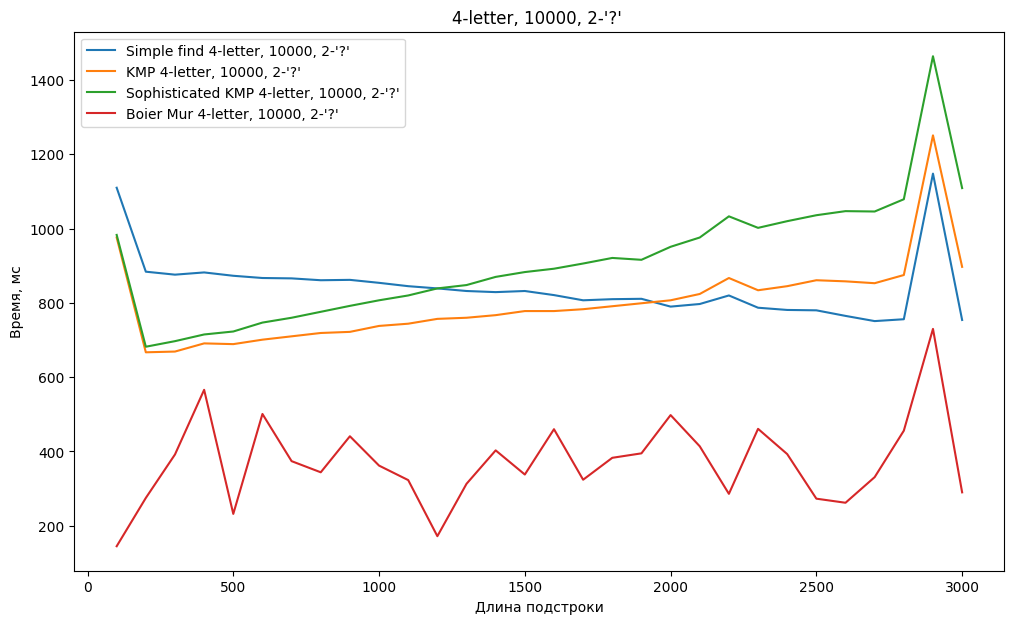

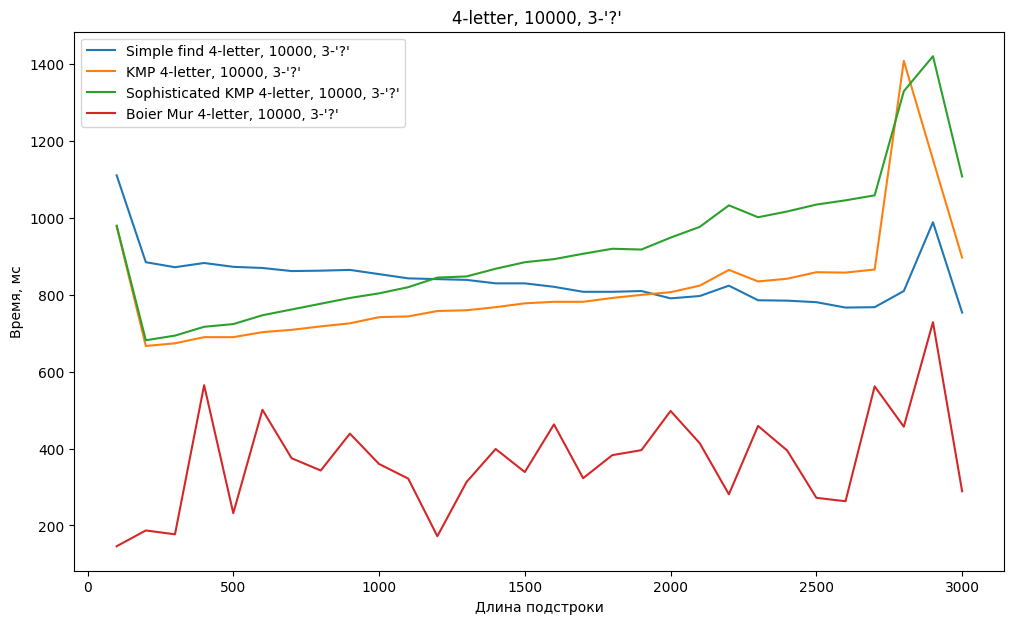

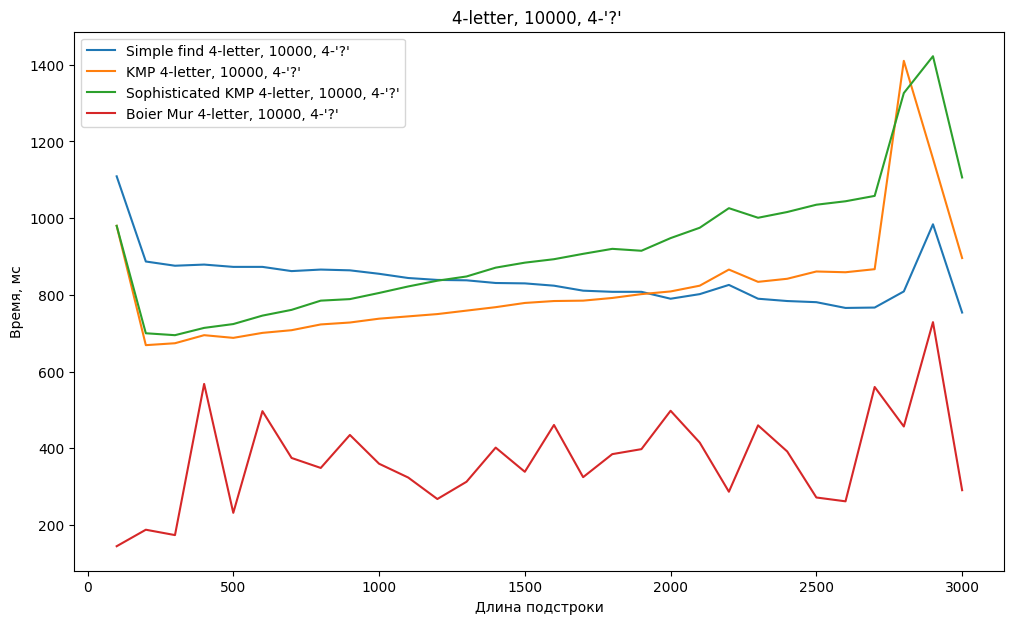

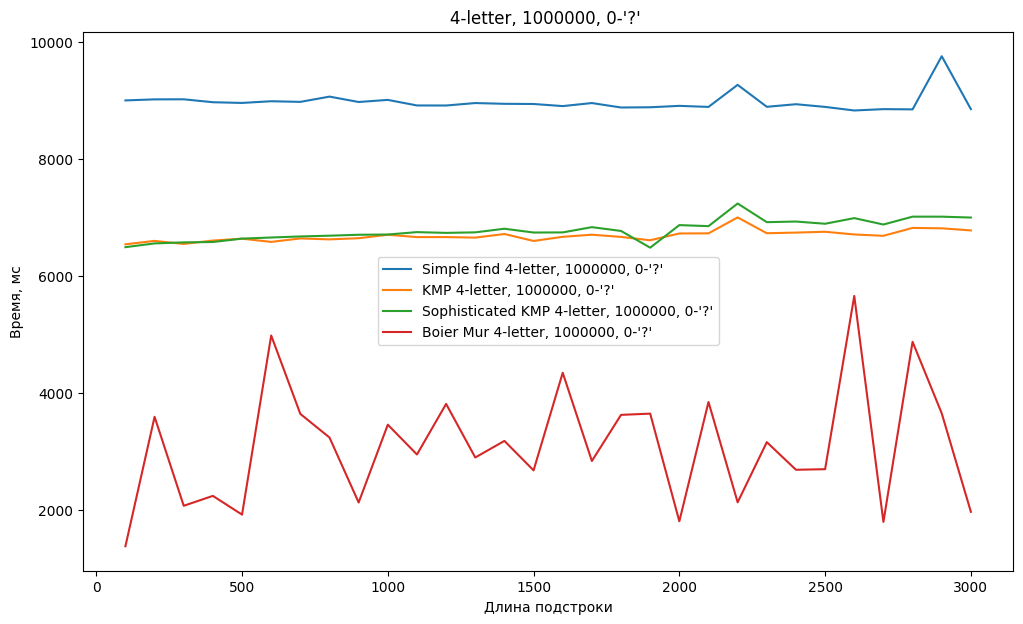

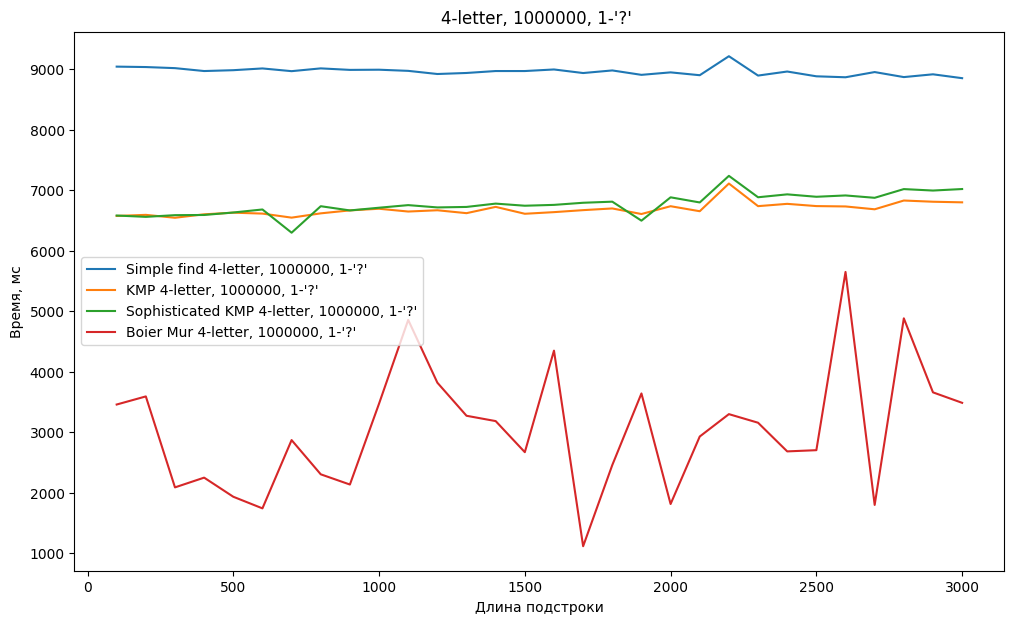

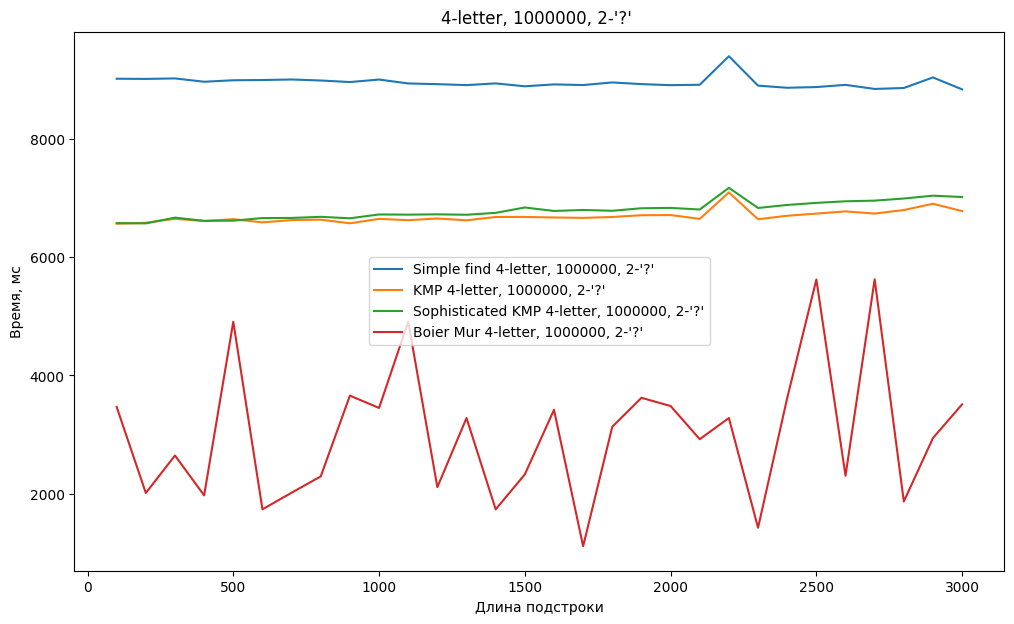

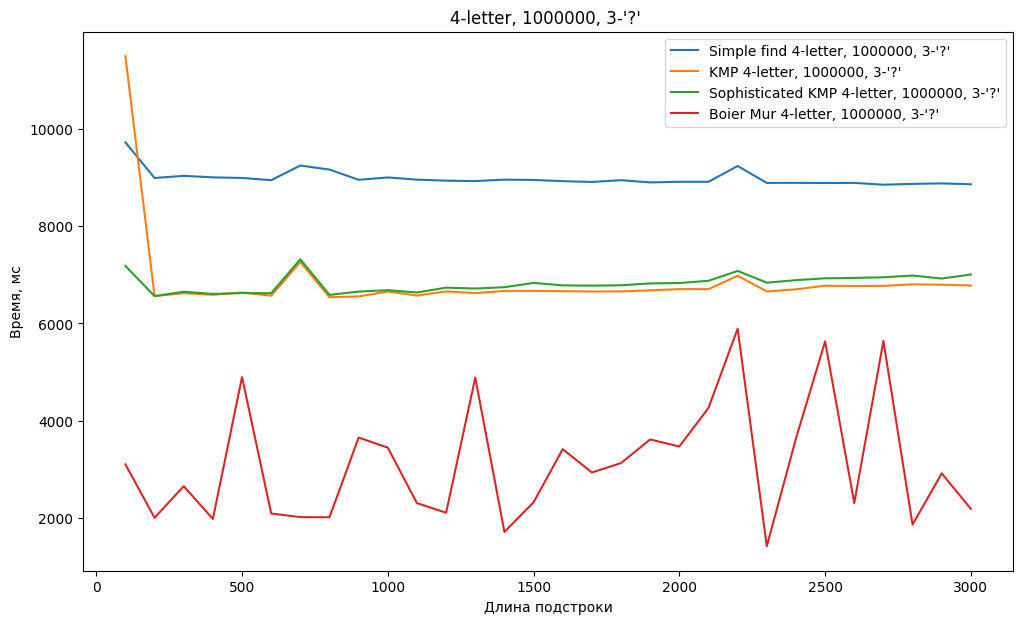

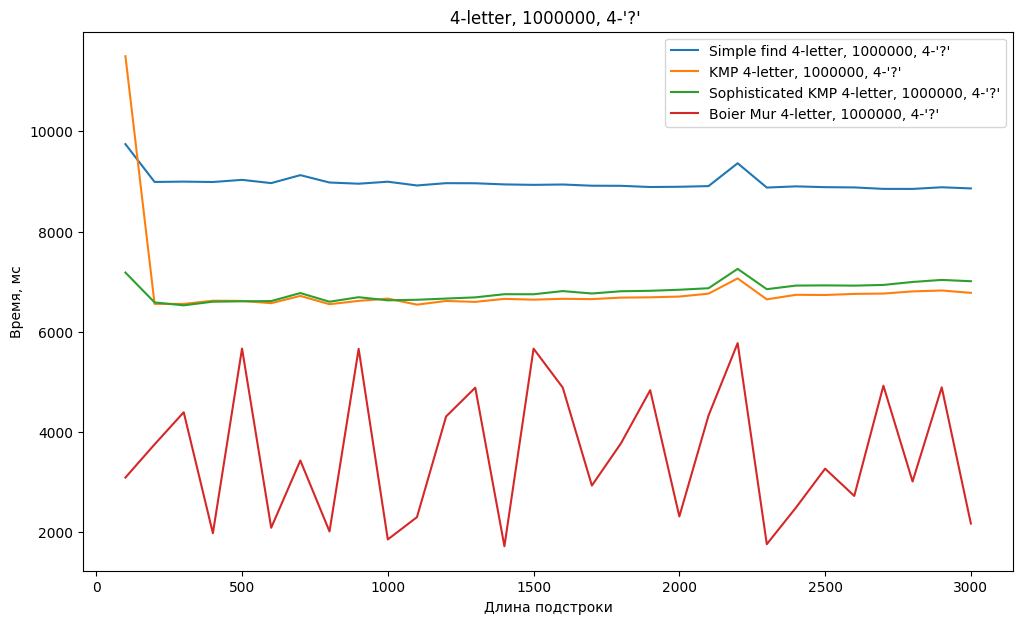

In [4]:
k=41
for j in range(11,21):
  x=np.arange(100,3001,100)
  plt.figure(figsize=(12, 7))
  for i in range(1,5):
    y=data.iloc[:, k+i-1]
    plt.plot(x,y,label = data.columns[k+i-1])
  plt.xlabel("Длина подстроки")
  plt.ylabel("Время, мс")
  plt.legend()
  plt.title(f"{data.columns[k][12:]} ")
  k+=4

## Наблюдения на алфавите на 4 символа
### На массиве 10000 символов:

1) Колебания в алгоритме Бойера-Мура, связанные с меняющейся асимптотикой, лучше стабилизировались по сравнению с прошлым вариантом тк на алфавите из 4 символов вероятность достичь худшего случая снизилась - теперь поиск на Бойере-Муре показывает оптимальные результаты 

2) 2 версии КМП и наивный алгоритм на небольшом массиве показывают примерно одинаковые результаты (накладные расходы на вычисление массива граней + уточненных граней не оправдываются на длине текста 10000 символов)

(Реализация подстановочных символов добавляет немного сравнений ( не сильно сказывается на характере поведения асимтотики, вклад идет только в константу)

### На массиве 1000000 символов:

1) Ситуация с алгоритмом Бойера-Мура остается оптимальной =>  несмотря на колебания график идет четко под графиками других алгоритмов (накладные расходы меньше, чем у КМП + мы не попадаем в худший из случаев)

2) 2 версии КМП стабильно по середине константа на линюю и показывает себя лучше чем наивный алгоритм

3) Наивный алгоритм показывает худшую асимптотику на ограниченном алфавите

### Послесловие 

1) КМП хороший алгоритм для данных на небольшом алфавите + большом массиве, который покрывает накладные расходы на вычисления граней

(конкретно на моих измерениях утонченные грани не сильно помогают, возможно они полезнее на алфавите большего размера)

2) Бойер-Мур, несмотря на колебания хорошо показывает себя при увеличении размера алфавита ( реже впадает в плохой случай, а также асимптотика в среднем улучшается)

3) Наивный алгоритм сравнительно неплох на небольших данных